In [66]:
import numpy as np

class Perceptron(object):
    """パーセプトロンの分類器

    パラメータ
    -----------------
    eta : float
        学習率 (0.0 より大きく 1.0以下の値)
    n_iter : int
        訓練データの訓練回数
    random_state : int
        重みを初期化するための乱数シード

    属性
    -----------------
    w_ : 1次配列
        適合後の重み
    errors_ : リスト
        各エポックでの誤分類（更新）の数
    
    """

    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        """訓練データに適合させる

        パラメータ
        ---------------
        X : {配列のようなデータ構造}、shape = [n_examples, n_features]
            訓練データ
            n_examplesは訓練データの個数、n_featuresは特徴量の個数
        y : 配列のようなデータ構造、shape = [n_examples]
            目的変数
        戻り値
        ---------------
        self:object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):  #訓練回数分まで訓練データを反復
            errors = 0
            for xi, target in zip(X, y):  #各訓練データで重みを更新
                #重み w1....wm の更新
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                #重み w0 の更新
                self.w_[0] += update
                #重みの更新が0でない場合は誤分類としてカウント
                errors += int(update != 0.0)
            #反復ごとの誤差を格納
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        """総入力を計算"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """1ステップ後のクラスラベルを返す"""
        return no.where(self.net_input(X) >= 0.0, 1, -1)


In [67]:
import os

import pandas as pd

In [68]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-database', 'iris', 'iris.data')

In [69]:
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-database/iris/iris.data


In [70]:
df = pd.read_csv(s, header=None, encoding='utf-8')

HTTPError: HTTP Error 404: Not Found

In [71]:
import pandas as pd

In [72]:
df = pd.read_csv(s, header=None, encoding='utf-8')

HTTPError: HTTP Error 404: Not Found

In [73]:
import os

In [74]:
import pandas as pd

In [75]:
s = os.path.join('https://archive.ics.uci.edu', 'ml', 'machine-learning-databases', 'iris', 'iris.data')

In [76]:
print('URL:', s)

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


In [77]:
df = pd.read_csv(s, header=None, encoding='utf-8')

In [78]:
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [79]:
import matplotlib.pyplot as plt

In [80]:
import numpy as np

In [92]:
y = df.iloc[0:100, 4].values

In [94]:
y = np.where(y == 'Iris-setosa', -1,1)

In [95]:
X = df.iloc[0:100, [0,2]].values

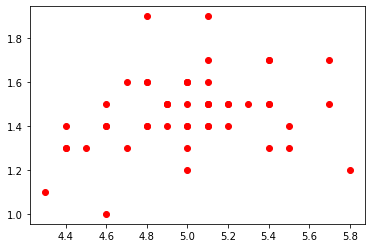

In [96]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')

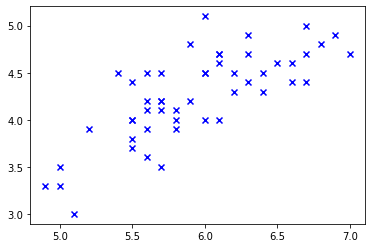

In [97]:
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')

Text(0.5, 0, 'sepal length [cm]')

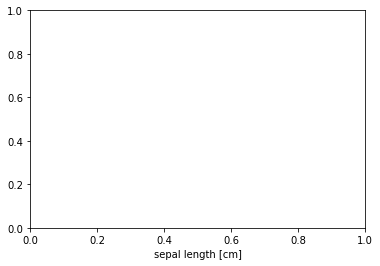

In [98]:
plt.xlabel('sepal length [cm]')

Text(0, 0.5, 'petal length [cm]')

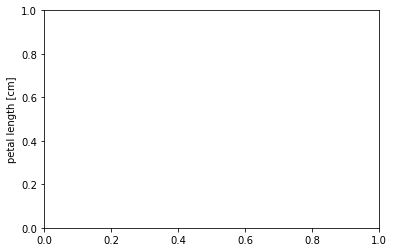

In [99]:
plt.ylabel('petal length [cm]')

No handles with labels found to put in legend.


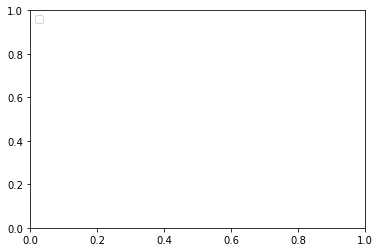

In [100]:
plt.legend(loc='upper left')

In [101]:
plt.show()

In [102]:
ppn = Perceptron(eta=0.1, n_iter=10)

In [103]:
ppn.fit(X, y)

TypeError: iteration over a 0-d array